In [1]:
from UnitlessDataGeneration import *

In [21]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

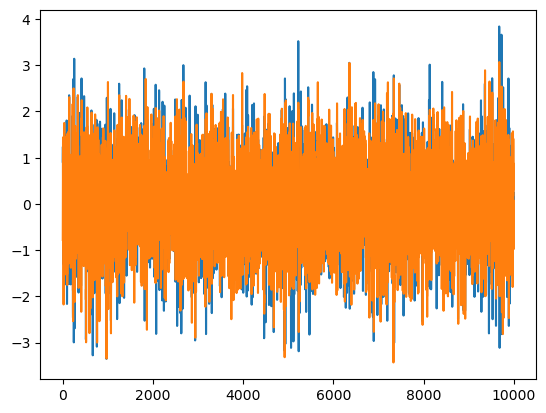

In [57]:
t = np.arange(10000)
sd = np.sqrt(.8)
xd = np.random.normal(scale=np.sqrt(1-sd**2)/3, size=t.shape)
xd[0:2] = np.random.normal(size=(2,))
for i in range(2, len(t)):
    xd[i]+=2*sd*xd[i-1] - sd*xd[i-2]
plt.plot(t, xd)
yd = np.random.normal(scale=np.sqrt(1-sd**2), size=t.shape)
yd[0] = np.random.normal()
for i in range(1, len(t)):
    yd[i]+=sd/3*xd[i-1]+sd*2/3*yd[i-1]
plt.plot(t, yd)

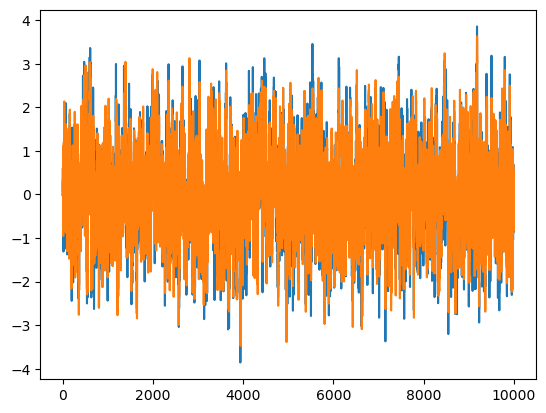

In [210]:
t = np.arange(10000)
sd = np.sqrt(.8)
xd = np.random.normal(scale=np.sqrt(1-sd**2)*10/9, size=t.shape)
xd[0] = np.random.normal()
for i in range(2, len(t)):
    xd[i]+=sd*xd[i-1]
plt.plot(t, xd)
yd = np.random.normal(scale=np.sqrt(1-sd**2), size=t.shape)
yd[0] = np.random.normal()
for i in range(1, len(t)):
    yd[i]+=sd/2*xd[i-1]+sd*1/2*yd[i-1]
plt.plot(t, yd)

In [211]:
np.std(xd), np.std(yd)

(1.085141251441364, 0.9667016865807467)

In [212]:
s = 1
solns = []
resids = []
variances = []
solns2 = []
while s<100:
    i = np.arange(0, len(t), step=s)
    xp = xd[i]
    #xp /= np.std(xp)
    yp = yd[i]
    #yp /= np.std(yp)
    soln, resid, _, _ = np.linalg.lstsq(np.array([xp[1:-1], yp[1:-1], xp[:-2]]).T, yp[2:])
    soln2, resid, _, _ = np.linalg.lstsq(np.array([xp[1:-1], xp[:-2]]).T, xp[2:])
    solns+=[soln[0:2]]
    solns2+=[soln2[0]]
    resids+=[resid[0]/len(xp)]
    variances+=[[np.var(xd[i]), np.var(yd[i])]]
    s+=1

/tmp/ipykernel_396873/2915352252.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  soln, resid, _, _ = np.linalg.lstsq(np.array([xp[1:-1], yp[1:-1], xp[:-2]]).T, yp[2:])
/tmp/ipykernel_396873/2915352252.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  soln2, resid, _, _ = np.linalg.lstsq(np.array([xp[1:-1], xp[:-2]]).T, xp[2:])


In [213]:
variances = np.array(variances)

In [214]:
ss = np.arange(1, s)

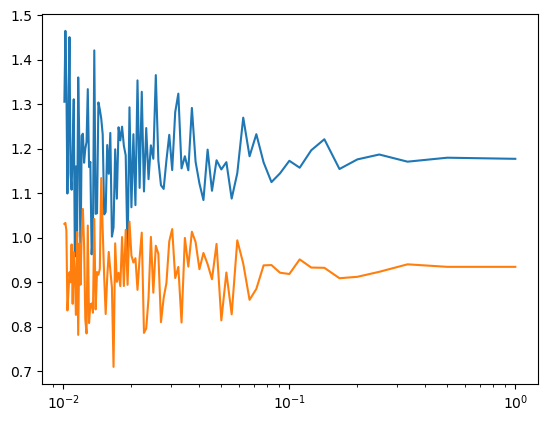

In [215]:
plt.semilogx(ss.astype(float)**(-1), variances)

In [216]:
solns = np.array(solns)

In [227]:
ss[50]

51

In [265]:
ss = np.arange(99)
ss

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98])

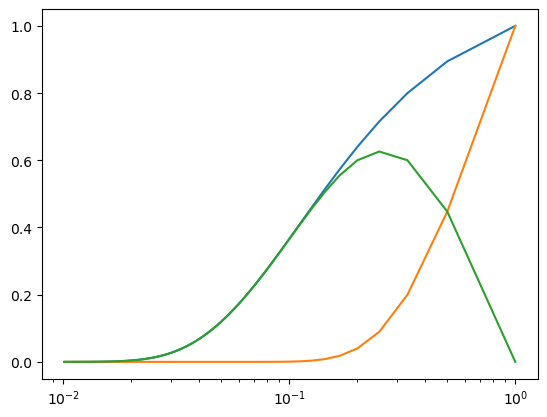

In [266]:
plt.semilogx(f, a**ss)
plt.semilogx(f, c**(ss.astype(float)))
plt.semilogx(f, b*(a**ss-c**ss)/(a-c))

/tmp/ipykernel_396873/323804233.py:8: RuntimeWarning: divide by zero encountered in reciprocal
  f2 = ss2.astype(float)**(-1)


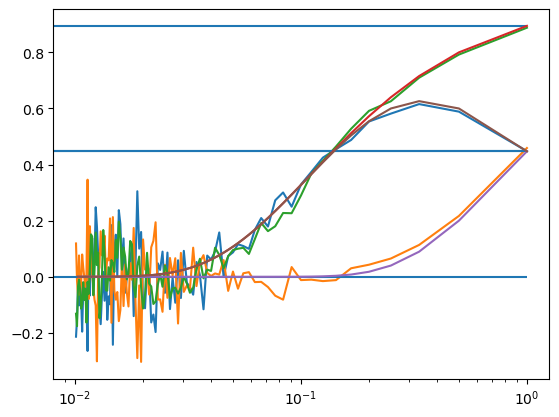

In [269]:
a = sd
b = sd/2
c = sd/2
plt.semilogx(f, solns)
plt.semilogx(f, solns2)
plt.hlines([0,a,b, c], 10**(-3), 1)
ss2 = np.arange(ss[-1])
f2 = ss2.astype(float)**(-1)
plt.semilogx(f2, a**ss2)
plt.semilogx(f2, c**ss2)
plt.semilogx(f2, b*(a**ss2-c**ss2)/(a-c))

In [254]:
ss[0]

1

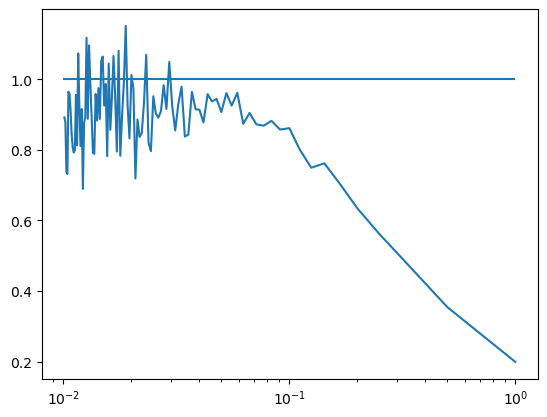

In [189]:
plt.semilogx(ss.astype(float)**(-1), resids)
plt.hlines(1, 10**-2, 1)

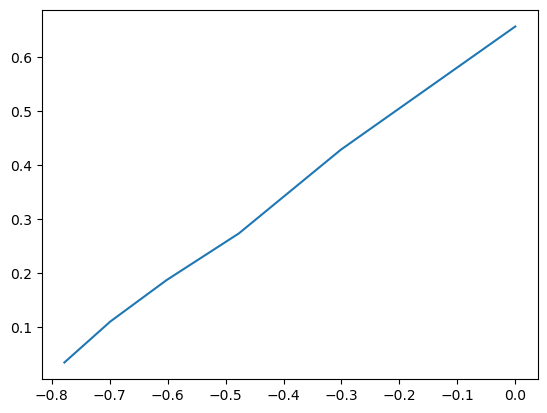

In [150]:
plt.plot(np.log10(ss[0:6].astype(float)**(-1)), solns[0:6,1])

In [161]:
(solns[0,1]-solns[5,1])/np.log10(ss[5].astype(float)/ss[0].astype(float))

0.8003409780822607

In [190]:
(solns[0,1]-solns[3,1])/np.log10(ss[3].astype(float)/ss[0].astype(float))

0.73082665879231

In [155]:
sd*3/4

0.6708203932499369

In [142]:
solns[0:10]

array([[ 0.20288789,  0.65654552],
       [ 0.37684435,  0.42818846],
       [ 0.44490681,  0.27295111],
       [ 0.44809945,  0.18627044],
       [ 0.45993071,  0.10959723],
       [ 0.44324528,  0.03375919],
       [ 0.40194243,  0.04046357],
       [ 0.36895741,  0.04556555],
       [ 0.34606403, -0.02429519],
       [ 0.2690686 ,  0.03203901]])

In [237]:
from scipy.signal import argrelextrema, savgol_filter

In [351]:
to_use = np.array([s in (argrelextrema(savgol_filter(solns[:,0], 20, 1), np.greater)[0]) for s in ss])

In [352]:
to_use[0]=True

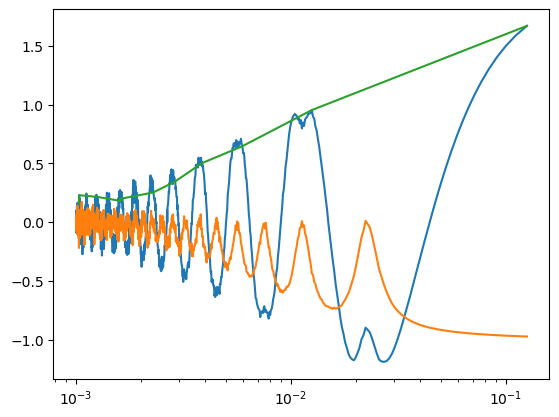

In [377]:
plt.semilogx(ss.astype(float)**(-1), solns)
#plt.semilogx(ss.astype(float)**(-1), savgol_filter(solns[:,1], 20, 1))
plt.semilogx(ss[use_idx].astype(float)**(-1), solns[use_idx, 0])

In [355]:
use_idx = np.where(to_use)[0]

In [376]:
use_idx = np.array([uid for i, uid in enumerate(use_idx[:-1]) if solns[uid,0]>solns[use_idx[i+1],0]]+[use_idx[-1]])

In [104]:
N = 10
draws = np.sqrt(np.random.f(1,1, 1000))

In [103]:
draws = np.abs(np.random.standard_cauchy(size=1000))

In [101]:
n1 = np.random.exponential(1000)
n2 = np.random.exponential(1000)
draws = n1/n2

In [105]:
autos = (1-(np.sqrt(2)/2)**(2*draws))

(array([ 84.,  93., 103.,  96., 108.,  89.,  70.,  79.,  74., 204.]),
 array([0.00439209, 0.10395288, 0.20351367, 0.30307446, 0.40263526,
        0.50219605, 0.60175684, 0.70131763, 0.80087842, 0.90043921,
        1.        ]),
 <BarContainer object of 10 artists>)

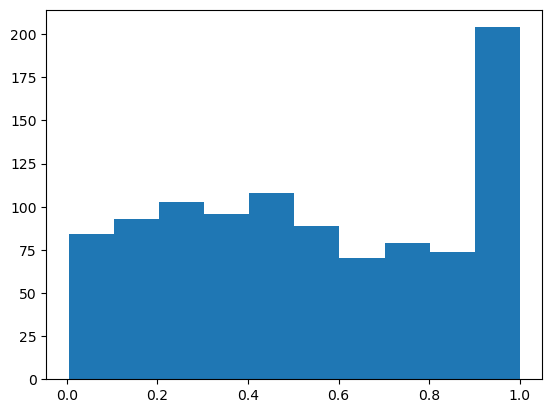

In [106]:
plt.hist(autos)

In [364]:
len(use_idx[:-1][solns[use_idx,0][:-1]<solns[use_idx,0][1:]])

17

In [348]:
for i, tu in enumerate(use_idx):
    if solns[tu, 0]<solns[use_idx[i+1], 0]:
        to_use[use_idx]=False

IndexError: index 27 is out of bounds for axis 0 with size 27

In [335]:
to_use[solns[:,0]==0.04895444]=False

In [324]:
ss[to_use]

array([  8,  80, 169, 259, 347, 437, 527, 572, 610, 614, 616, 656, 659,
       700, 702, 705, 736, 742, 744, 755, 787, 790, 792, 815, 832, 838,
       866, 876, 879, 883, 888, 931, 961, 966, 970])

In [226]:
l2 = np.array([2**i for i in range(3,int(np.ceil(np.log2(ss[-1]))))])

In [230]:
to_use = np.array([s in l2 for s in ss])

In [380]:
solns[use_idx,0]/solns[use_idx,1]

array([-1.71393391, -2.18718312, -2.90733564, -4.516052  , -4.08527822,
       -5.47889127,  2.15273671,  9.28089709, 11.0366812 ,  7.77464189,
       16.23439627, -1.12379873])

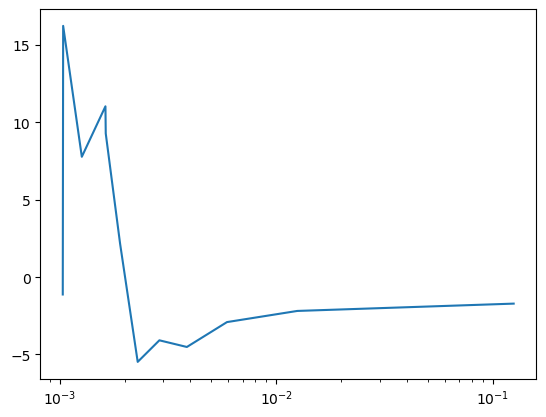

In [379]:
plt.semilogx(ss[use_idx].astype(float)**(-1), solns[use_idx,0]/solns[use_idx,1])


In [218]:
np.mean(solns[:,0]/solns[:,1])

0.4531239256339427

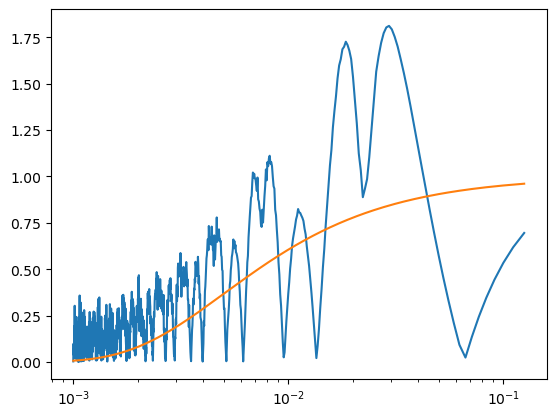

In [208]:
plt.semilogx(ss.astype(float)**(-1), np.abs(np.sum(np.array(solns), axis=1)))
plt.semilogx(ss.astype(float)**(-1), sd**(1/ss.astype(float)**(-1)))

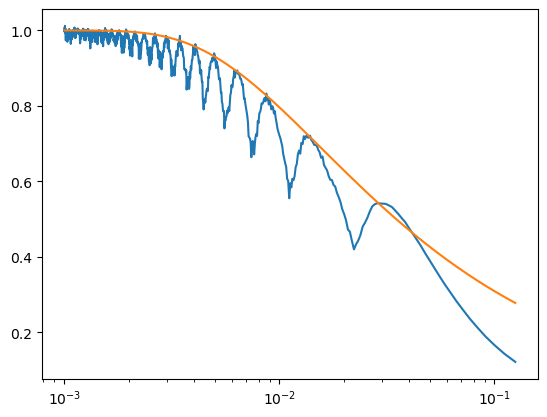

In [202]:
resids = np.array(resids)
select_ = resids==resids
plt.semilogx(ss[select_].astype(float)**(-1), resids[select_]**.5)
plt.semilogx(ss.astype(float)**(-1), np.sqrt(1 - sd**(2/ss.astype(float)**(-1))))

In [101]:
ss[select_]

array([], dtype=int64)

In [33]:
i = np.arange(0, len(t), step=s)
xp = x[i]
soln, resid, _, _ = np.linalg.lstsq(np.array([xp[:-2], xp[1:-1]]).T, xp[2:])

/tmp/ipykernel_1774410/1779067280.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  soln, resid, _, _ = np.linalg.lstsq(np.array([xp[:-2], xp[1:-1]]).T, xp[2:])


In [34]:
soln

array([-1.        ,  1.99960001])

In [15]:
np.var(x)

0.9792311673985387

In [25]:
np.array([x[:-2], x[1:-1]]).T.shape

(1998, 2)

In [23]:
x[2:].shape

(1998,)

In [28]:
soln, resid, _, _ = np.linalg.lstsq(np.array([x[:-2], x[1:-1]]).T, x[2:])

/tmp/ipykernel_1774410/1640833245.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  soln, resid, _, _ = np.linalg.lstsq(np.array([x[:-2], x[1:-1]]).T, x[2:])


In [29]:
soln

array([-1.    ,  1.9999])

In [32]:
np.sqrt(resid[0]/(len(x)-2))

1.6516084421788116e-15

In [1]:
from UnitlessDataGeneration import *

In [2]:
iid = Graph.gen_dataset(2, 100, 1000, init_args={'init_type': 'connected'}, every=50)

100% completed


(array([ 44.,  52.,  47.,  65.,  87.,  84.,  85.,  83., 128., 325.]),
 array([0.00207942, 0.10187117, 0.20166292, 0.30145467, 0.40124642,
        0.50103817, 0.60082992, 0.70062167, 0.80041342, 0.90020517,
        0.99999692]),
 <BarContainer object of 10 artists>)

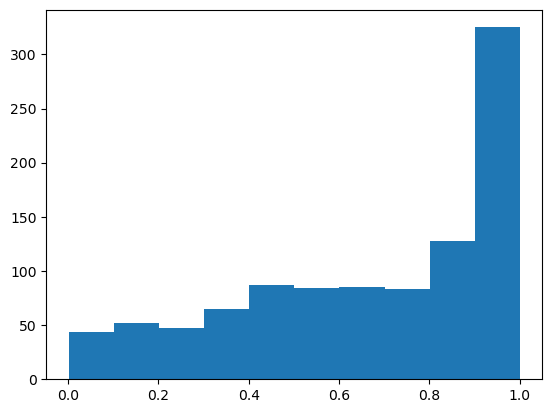

In [3]:
plt.hist([g.s[g.topo_order[-1]]**2 for g in iid])

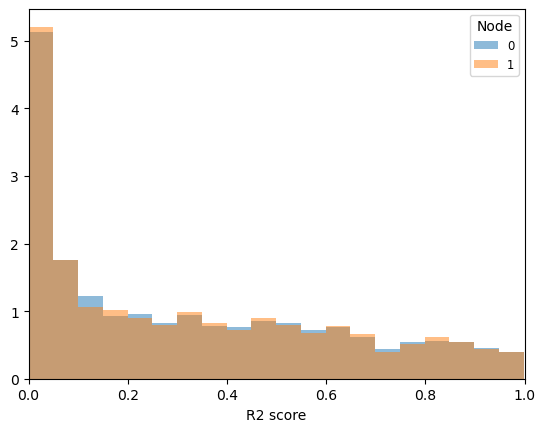

In [4]:
SortabilityPlotting.plot_stat_dist(np.array([g.data.R2().squeeze()[g.topo_order] for g in iid]), '')

In [5]:
np.max(np.array([g.data.R2().squeeze()[g.topo_order] for g in iid]), axis=0)

array([0.99826361, 0.99826344])

In [7]:
ts = tsGraph.gen_dataset(2, 1, 100, 1000, init_args={'init_type': 'no_feedback', 'p':1})

Discarded 20 systems due to the following errors: 
0 ConvergenceErrors, 0 UnstableErrors, 20 GenerationErrors, and 0 TimeoutExceptions


In [8]:
r2s = np.array([g.data.R2_summary(tau_max=1).squeeze()[g.topo_order] for g in ts])

In [9]:
np.max(r2s, axis=0)

array([0.99626004, 0.99734833])

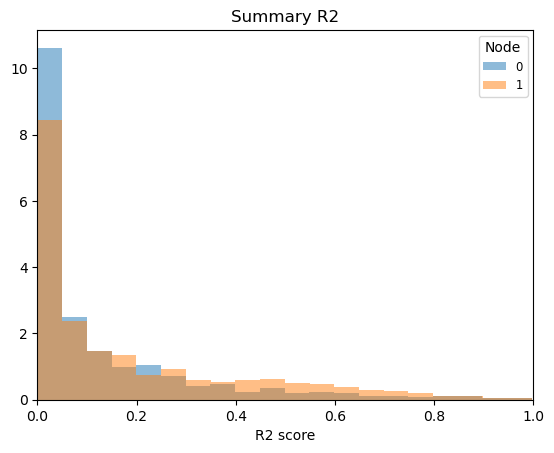

In [10]:
SortabilityPlotting.plot_stat_dist(r2s, 'Summary R2')

In [11]:
r2s = np.array([g.data.R2(tau_max=1).squeeze()[g.topo_order] for g in ts])

In [12]:
np.min(r2s, axis=0)

array([0., 0.])

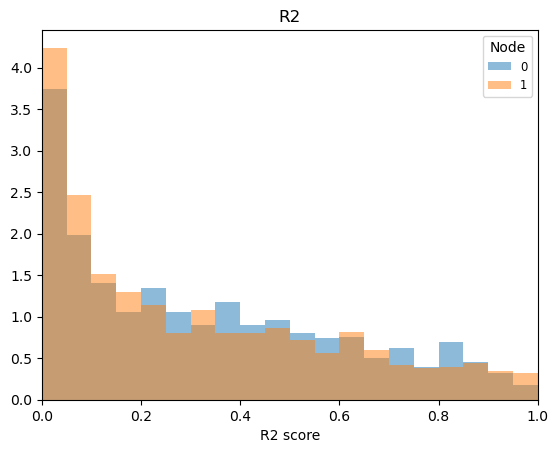

In [13]:
SortabilityPlotting.plot_stat_dist(r2s, 'R2')

In [14]:
ACVs = np.array([np.diag(g.cov[:,:,1]).astype(float)[g.topo_order] for g in ts])

(-1.0, 1.0)

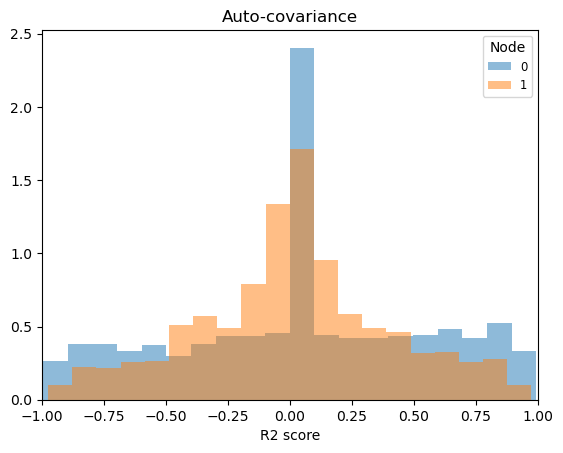

In [15]:
SortabilityPlotting.plot_stat_dist(ACVs, 'Auto-covariance')
plt.xlim([-1,1])

In [16]:
ACVp = np.abs(ACVs)
np.mean(ACVp[:,1]>ACVp[:,0])

0.444

In [17]:
B = 1000
num_models = 1000
R2means = np.ones((B,2))*np.nan
for i in range(B):
    R2means[i,:] = np.mean(np.abs(ACVs)[np.random.choice(np.arange(num_models), size=(num_models,)),:], axis=0)
np.mean(R2means, axis=0), 2*np.std(R2means, axis=0)

(array([0.388753, 0.297774]), array([0.02041239, 0.01627989]))

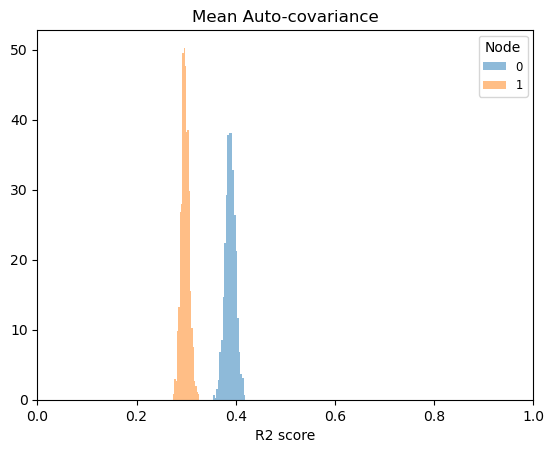

In [19]:
SortabilityPlotting.plot_stat_dist(R2means, 'Mean Auto-covariance')

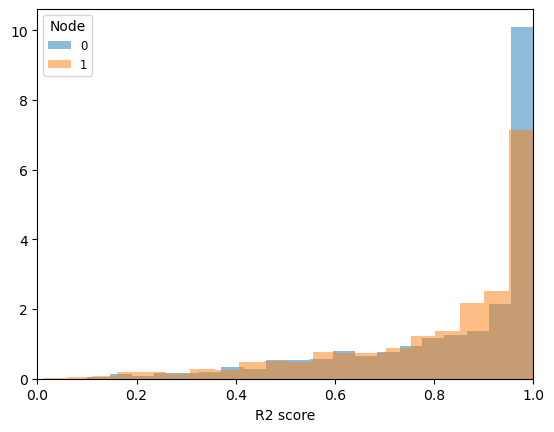

In [20]:
SortabilityPlotting.plot_stat_dist(np.array([g.s[g.topo_order] for g in ts]).astype(float), '')

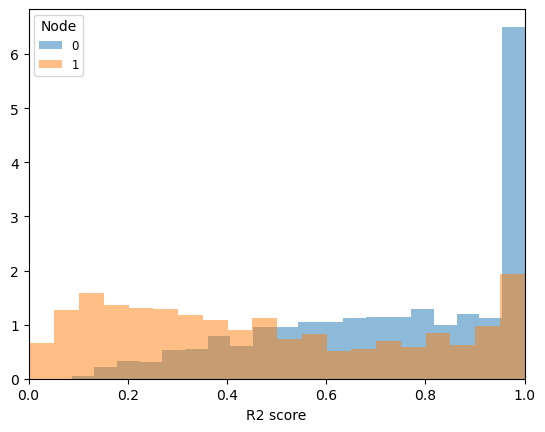

In [25]:
SortabilityPlotting.plot_stat_dist(np.array([g.s[g.topo_order] for g in ts]).astype(float), '')

In [16]:
ccv = np.array([g.cov[1,1,-1] for g in ts]).astype(float)

In [17]:
ccv = ccv[np.abs(ccv)<1]

(array([ 80.,  80.,  81.,  94., 122., 249.,  85.,  80.,  74.,  55.]),
 array([-0.99953911, -0.80035227, -0.60116543, -0.40197859, -0.20279175,
        -0.00360492,  0.19558192,  0.39476876,  0.5939556 ,  0.79314244,
         0.99232928]),
 <BarContainer object of 10 artists>)

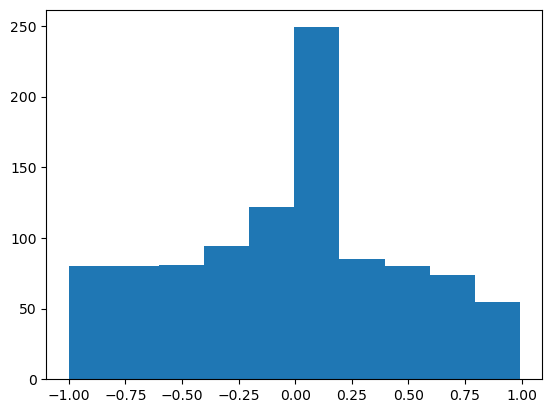

In [18]:
plt.hist(ccv)

(array([ 58.,  54.,  56.,  53.,  65.,  78.,  89.,  97., 116., 334.]),
 array([0.00375486, 0.10337938, 0.20300389, 0.3026284 , 0.40225292,
        0.50187743, 0.60150194, 0.70112646, 0.80075097, 0.90037549,
        1.        ]),
 <BarContainer object of 10 artists>)

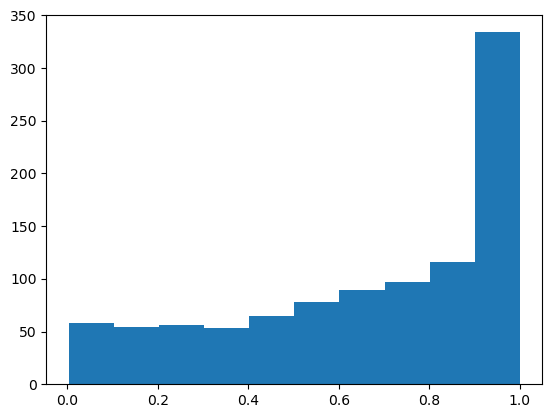

In [19]:
plt.hist(np.array([g.s[0]**2 for g in ts]).astype(float))

In [1]:
from UnitlessDataGeneration import *

Graph 140735807524560

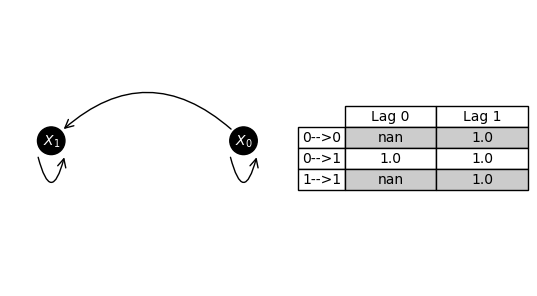

In [2]:
G = tsGraph(2, 1, init_type='no_feedback', p=1, p_auto=1)
G

discarded 0 unstable solutions and 1 solution producing a covariance matrix that was not positive semi-definite


Graph 140735807524560

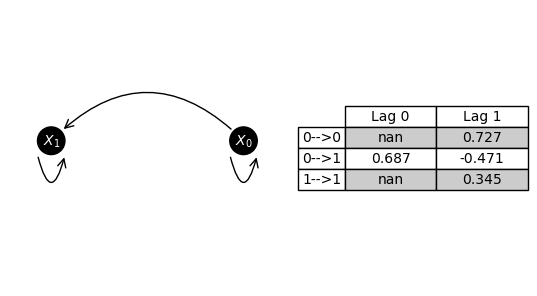

In [3]:
G.gen_coefficients()

In [8]:
(G**2).sum(axis='source')

array([[0.17653521, 0.07668531],
       [0.        , 0.88654988]])

TimeSeries 140735662833488

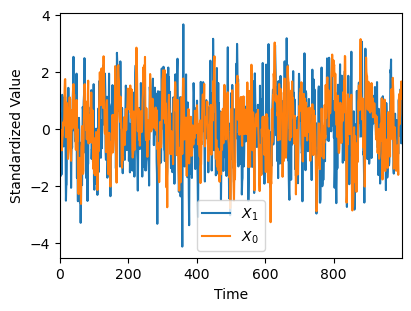

In [4]:
G.gen_data(1000)

In [5]:
G.cov[:,:,1]

array([[0.72690831, 0.16194684],
       [0.12352863, 0.24758303]])

In [6]:
G.s

array([0.686734522456465, 0.949530613098489], dtype=object)

In [12]:
G.data.R2_summary(tau_max=G.tau_max)

array([[0.0419354 ],
       [0.04247246]])

In [3]:
G.components

[array([0])]

In [14]:
G.A

array([[[0., 1.],
        [0., 1.]],

       [[1., 1.],
        [0., 1.]]])

In [4]:
Bp_init = G.get_adjacencies().astype(float)
Bp=Bp_init*np.random.normal(size=Bp_init.shape)

In [13]:
Bp * ~np.diag(np.diag(Bp))

TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [3]:
G.topo_order

array([0, 0])

TimeSeries 140735510182032

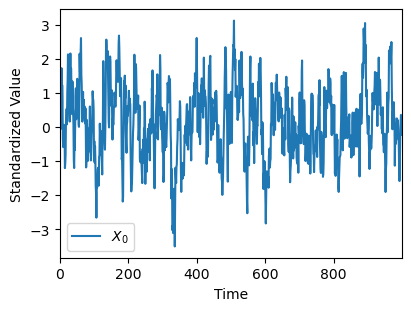

In [11]:
G.gen_data()

In [5]:
G.s

array([0.882096675938553], dtype=object)

In [70]:
[i for i in G.variables]

[0]

In [41]:
import numpy as np

In [71]:
num_models = 30000
O = 5000
R2s = np.ones((num_models,))*np.nan
for i in range(num_models):
    X0 = np.random.normal(size=(O,))
    X12 = 1/3**.5*np.array([X0,X0]) + np.random.normal(scale=(2/3)**.5, size=(2, O)) #don't see the improvement because I made the noises equal.
    soln, resid, _, _ = np.linalg.lstsq(X12.T, X0)
    R2s[i] = 1-(resid/O)/np.var(X0)

/tmp/ipykernel_1026699/2176148551.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  soln, resid, _, _ = np.linalg.lstsq(X12.T, X0)
/tmp/ipykernel_1026699/2176148551.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  R2s[i] = 1-(resid/O)/np.var(X0)


In [73]:
R2s = np.ones((num_models,))*np.nan
for i in range(num_models):
    X01 = np.random.normal(size=(O,2))
    X2 = np.sum(0.5*X01, axis=1)+np.random.normal(scale=1/2**.5, size=(O,)) 
    soln, resid, _, _ = np.linalg.lstsq(X01, X2)
    R2s[i] = 1-(resid/O)/np.var(X2)

/tmp/ipykernel_1026699/1359543716.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  soln, resid, _, _ = np.linalg.lstsq(X01, X2)
/tmp/ipykernel_1026699/1359543716.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  R2s[i] = 1-(resid/O)/np.var(X2)


In [74]:
R2means = np.ones((B,))*np.nan
for i in range(B):
    R2means[i] = np.mean(R2s[np.random.choice(np.arange(num_models), size=(num_models,))])
np.mean(R2means), 2*np.std(R2means)

(0.5000235320096612, 0.0001153427366542585)

In [2]:
sortability_compare_p(N=10, tau_max=1, B=1000, further_init_args={'init_type':'no_feedback', 'p_auto':1})

p = 0.1:
0% completed (3 discarded)

KeyboardInterrupt: 

In [5]:
sortability_compare_p(N=10, tau_max=0, B=1000, coef_args={'convergence_attempts': 1})

p = 0.1:
16% completed (0 discarded)

KeyboardInterrupt: 

p = 0.1:
100% completed (0 discarded)
p = 0.2:
100% completed (0 discarded)
p = 0.3:
100% completed (0 discarded)
p = 0.4:
100% completed (0 discarded)
p = 0.5:
100% completed (0 discarded)
p = 0.6:
100% completed (0 discarded)
p = 0.7:
100% completed (0 discarded)
p = 0.8:
100% completed (0 discarded)
p = 0.9:
100% completed (0 discarded)
p = 1.0:
100% completed (0 discarded)


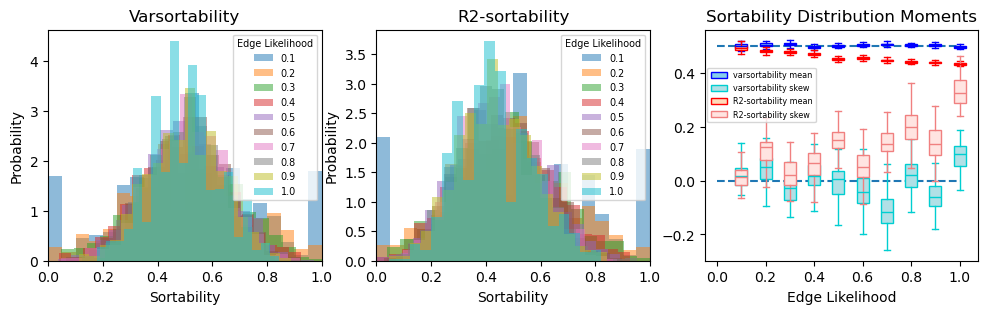

In [3]:
sortability_compare_p(N=10, tau_max=0, B=1000, coef_args={'convergence_attempts': 1})

In [8]:
sortability_compare_p(N=6, tau_max=1, ps = [.1, .5, .9], B=300, coef_args={'convergence_attempts': 1})

p = 0.1:
Discarded 22 systems due to the following errors: 
1 ConvergenceError, 11 UnstableErrors, 10 GenerationErrors, and 0 TimeoutExceptions
p = 0.5:
5% completed (49 discarded)

/home/b/b309244/UnitlessDataGeneration/UnitlessDataGeneration.py:1093: RuntimeWarning: invalid value encountered in sqrt
  return np.real(((r**2*matmulres + (1-r**2)*norm)**.5)[0,0])


6% completed (61 discarded)

KeyboardInterrupt: 

p = 0.25:
Discarded 1 system due to the following errors: 
0 ConvergenceErrors, 0 UnstableErrors, 0 GenerationErrors, and 1 TimeoutException
p = 0.5:
100% completed (0 discarded)
p = 0.75:
100% completed (0 discarded)
p = 1:
Discarded 1 system due to the following errors: 
0 ConvergenceErrors, 0 UnstableErrors, 0 GenerationErrors, and 1 TimeoutException


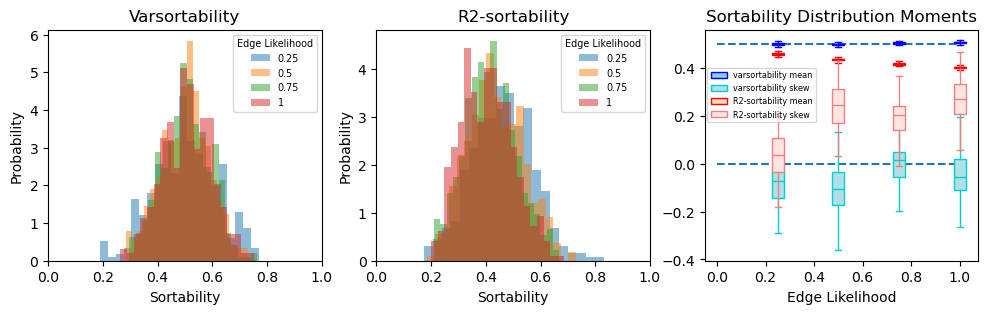

In [13]:
sortability_compare_p(tau_max=0, ps = [.25, .5, .75, 1], B=400, coef_args={'convergence_attempts': 1})

p = 0.1:
100% completed
p = 0.2:
100% completed
p = 0.3:
100% completed
p = 0.4:
100% completed
p = 0.5:
100% completed
p = 0.6:
100% completed
p = 0.7:
100% completed
p = 0.8:
100% completed
p = 0.9:
100% completed
p = 1.0:
100% completed


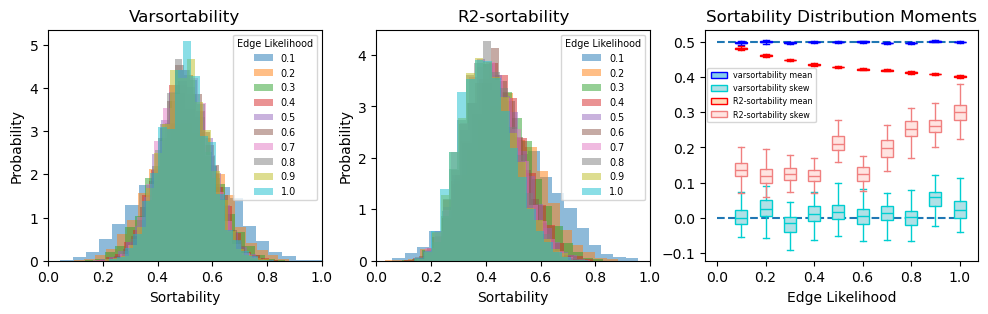

In [2]:
sortability_compare_p()

colliders:
100% completed
chains:
100% completed
confounders:
100% completed


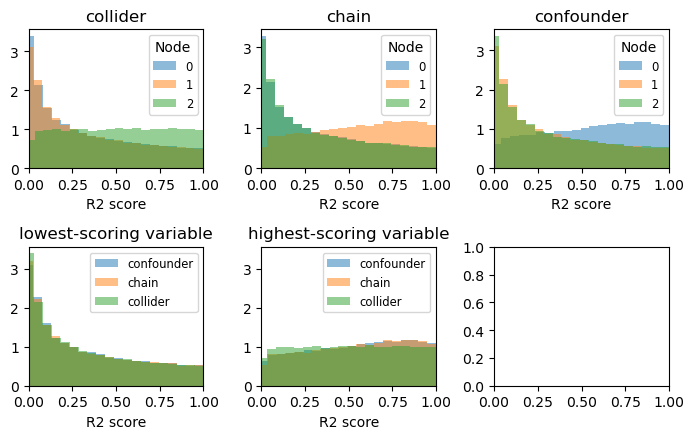

In [2]:
sortability_compare_triple_types(B = 50000)

colliders:
Discarded 23 systems due to the following errors: 
0 ConvergenceErrors, 0 UnstableErrors, 23 GenerationErrors, and 0 TimeoutExceptions
chains:
Discarded 21 systems due to the following errors: 
0 ConvergenceErrors, 0 UnstableErrors, 21 GenerationErrors, and 0 TimeoutExceptions
confounders:
Discarded 24 systems due to the following errors: 
0 ConvergenceErrors, 0 UnstableErrors, 24 GenerationErrors, and 0 TimeoutExceptions


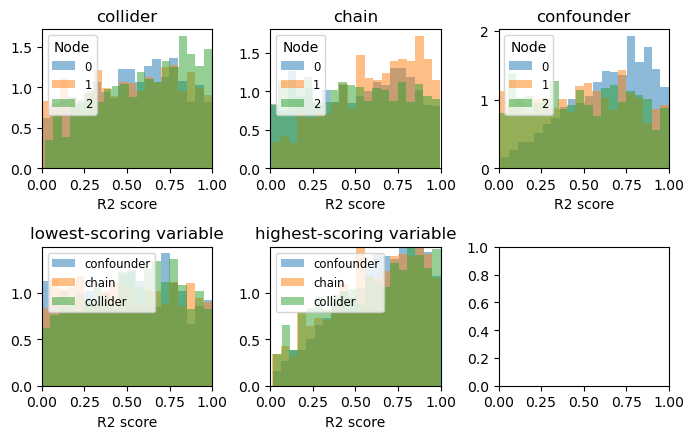

In [4]:
sortability_compare_triple_types(tau_max=1, B=1000)

colliders:
Discarded 4598 systems due to the following errors: 
0 ConvergenceErrors, 441 UnstableErrors, 4157 GenerationErrors, and 0 TimeoutExceptions
chains:
Discarded 1861 systems due to the following errors: 
0 ConvergenceErrors, 4 UnstableErrors, 1856 GenerationErrors, and 1 TimeoutException
confounders:
Discarded 1759 systems due to the following errors: 
0 ConvergenceErrors, 8 UnstableErrors, 1751 GenerationErrors, and 0 TimeoutExceptions


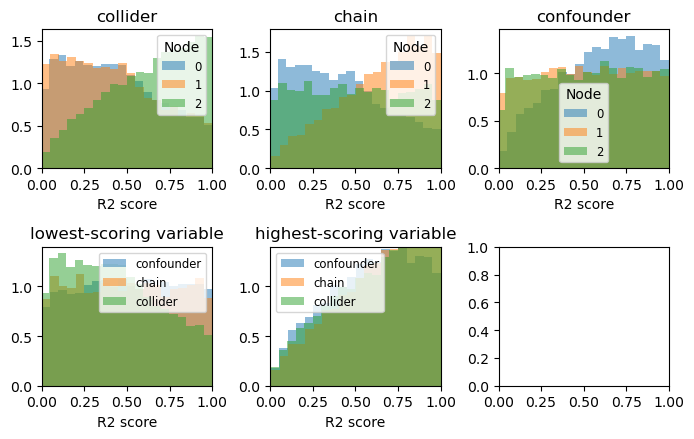

In [5]:
sortability_compare_triple_types(tau_max=1, B=10000)

colliders:
	N = 3:
100% completed
	N = 4:
100% completed
	N = 5:
100% completed
	N = 6:
100% completed
	N = 7:
100% completed
	N = 8:
100% completed
	N = 9:
100% completed
	N = 10:
100% completed
	N = 11:
100% completed
	N = 12:
100% completed
	N = 13:
100% completed
	N = 14:
100% completed
	N = 15:
100% completed
	N = 16:
100% completed
	N = 17:
100% completed
	N = 18:
100% completed
	N = 19:
100% completed
	N = 20:
100% completed
	N = 21:
100% completed
confounders:
	N = 3:
100% completed
	N = 4:
100% completed
	N = 5:
100% completed
	N = 6:
100% completed
	N = 7:
100% completed
	N = 8:
100% completed
	N = 9:
100% completed
	N = 10:
100% completed
	N = 11:
100% completed
	N = 12:
100% completed
	N = 13:
100% completed
	N = 14:
100% completed
	N = 15:
100% completed
	N = 16:
100% completed
	N = 17:
100% completed
	N = 18:
100% completed
	N = 19:
100% completed
	N = 20:
100% completed
	N = 21:
100% completed


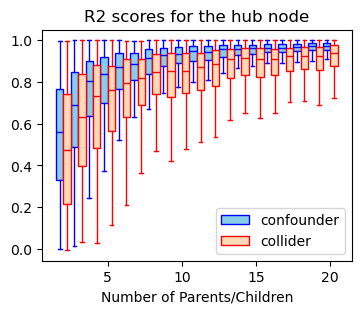

In [2]:
sortability_compare_collider_confounder()

In [2]:
DS = Graph.gen_dataset(N=20, O=100, B=10000)
DS

<List of 10000 Graphs>

Graph 140735800932688

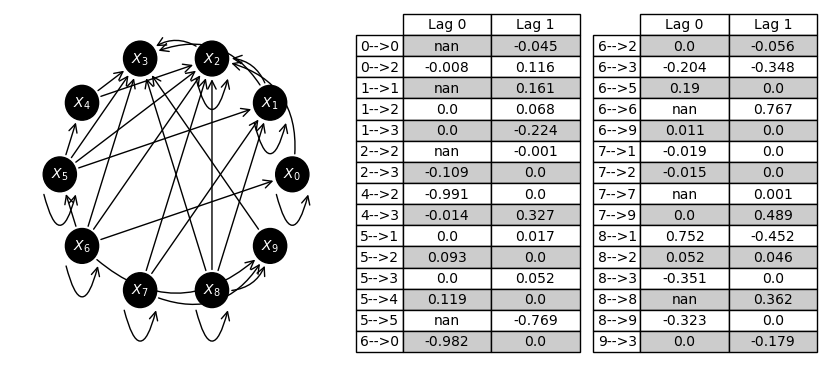

In [9]:
G = DS[0]
G

TimeSeries 140735800014416

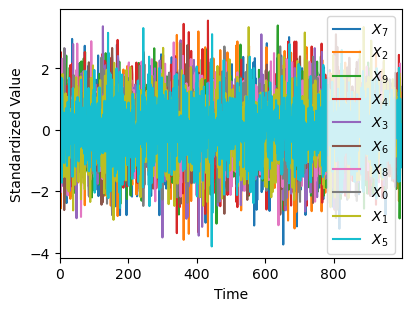

In [10]:
G.data

In [2]:
text_trap = io.StringIO()

In [4]:
text_trap.read()

''

In [5]:
DS = tsGraph.gen_dataset(N=10, tau_max=0, T=1000, B=10, init_args={'init_type': 'no_feedback'}, coef_args={'convergence_attempts':3}, verbose=True)
DS

Discarded 1 system due to the following errors: 
0 ConvergenceErrors, 1 UnstableError, 0 GenerationErrors, and 0 TimeoutExceptions



<List of 10 tsGraphs>

In [2]:
import time

In [3]:
G = Graph(20)

In [4]:
start = time.time()
_ = G.gen_coefficients()
end = time.time()
print("Total elapsed time = {}".format(end-start))

Elapsed time to... calc C/cov=0.00, calc s2=0.00, re-sort=0.00
Total elapsed time = 0.0014421939849853516


Graph 140735562132496

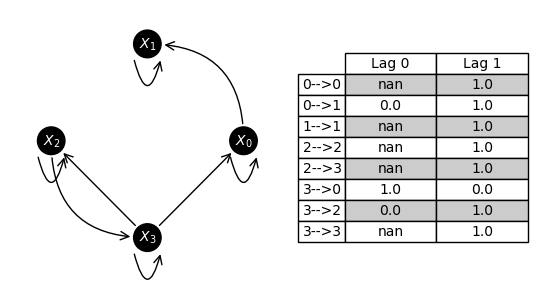

In [25]:
G = tsGraph(4,1, p_auto=1)
G

                                                                     
Total elapsed time = 0.2943539619445801


Graph 140735562132496

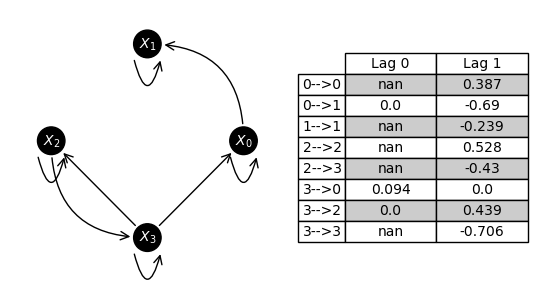

In [26]:
start = time.time()
G.gen_coefficients()
end = time.time()
print("Total elapsed time = {}".format(end-start))
G

Graph 140735840413392

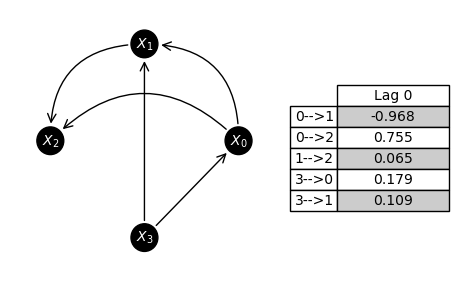

In [8]:
G.gen_coefficients()

TimeSeries 140735668315856

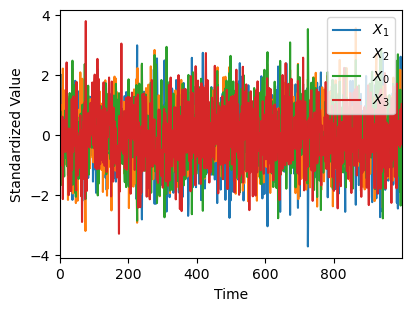

In [9]:
G.gen_data(1000)

In [10]:
G.s2

array([0.968097147375387, 0.0892847073449881, 0.518831104037066, 1],
      dtype=object)

In [11]:
G.sortability()

0.8333333333333334

In [14]:
G._reset_cov()

In [15]:
G.cov[:,:,1]

array([[R0.0(1), R0.1(1), R0.2(1), R0.3(1)],
       [R1.0(1), R1.1(1), R1.2(1), R1.3(1)],
       [R2.0(1), R2.1(1), R2.2(1), R2.3(1)],
       [R3.0(1), R3.1(1), R3.2(1), R3.3(1)]], dtype=object)

In [9]:
G.components

[array([3, 0, 2, 1])]

In [9]:
1/lags_per_process

/tmp/ipykernel_2506577/2671954226.py:1: RuntimeWarning: divide by zero encountered in divide
  1/lags_per_process


array([[inf, inf, inf, 1. ],
       [1. , 1. , 0.5, inf],
       [1. , inf, inf, 1. ],
       [1. , 1. , inf, 1. ]])

In [7]:
np.random.normal(size=G.shape, 

(4, 4, 2)

Graph 140735835517328

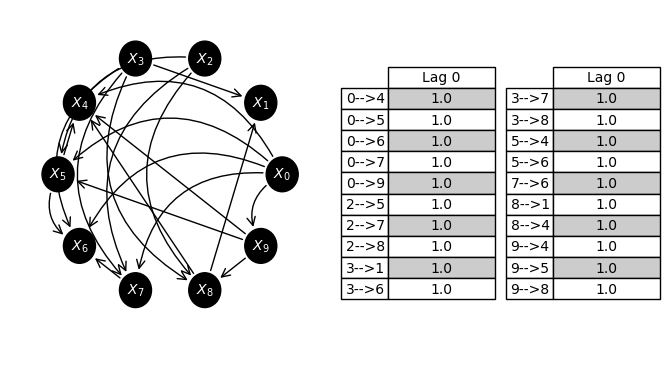

In [2]:
G = tsGraph(10, 0, init_type='no_feedback', p_auto=0)
G

In [4]:
G.A

array([[[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.]],

       [[0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

      

In [3]:
G.components

[array([0]),
 array([2]),
 array([3]),
 array([9]),
 array([5]),
 array([7]),
 array([8]),
 array([1]),
 array([4]),
 array([6])]

In [7]:
G.gen_coefficients()
G

Attempt 1/10

ValueError: Could not find root within given tolerance. (56333.3368051165462773 > 2.16840434497100886801e-19)
Try another starting point or tweak arguments.

In [3]:
G.style = "standardized"

In [4]:
G._reset_cov()
G.cov

array([[[1, R1.0(0), R0.2(0), R0.3(0), R0.4(0), 0, R0.6(0), R0.7(0),
         R0.8(0), R0.9(0)],
        [R1.0(0), 1, R1.2(0), R1.3(0), R1.4(0), 0, R1.6(0), R1.7(0),
         R1.8(0), R1.9(0)],
        [R0.2(0), R1.2(0), 1, R3.2(0), R4.2(0), 0, R2.6(0), R7.2(0),
         R8.2(0), R2.9(0)],
        [R0.3(0), R1.3(0), R3.2(0), 1, R3.4(0), 0, R3.6(0), R3.7(0),
         R3.8(0), R3.9(0)],
        [R0.4(0), R1.4(0), R4.2(0), R3.4(0), 1, 0, R4.6(0), R7.4(0),
         R8.4(0), R4.9(0)],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [R0.6(0), R1.6(0), R2.6(0), R3.6(0), R4.6(0), 0, 1, R7.6(0),
         R8.6(0), R9.6(0)],
        [R0.7(0), R1.7(0), R7.2(0), R3.7(0), R7.4(0), 0, R7.6(0), 1,
         R7.8(0), R7.9(0)],
        [R0.8(0), R1.8(0), R8.2(0), R3.8(0), R8.4(0), 0, R8.6(0),
         R7.8(0), 1, R8.9(0)],
        [R0.9(0), R1.9(0), R2.9(0), R3.9(0), R4.9(0), 0, R9.6(0),
         R7.9(0), R8.9(0), 1]]], dtype=object)

In [5]:
G._reset_s2()
G.s2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Graph 140737069383760

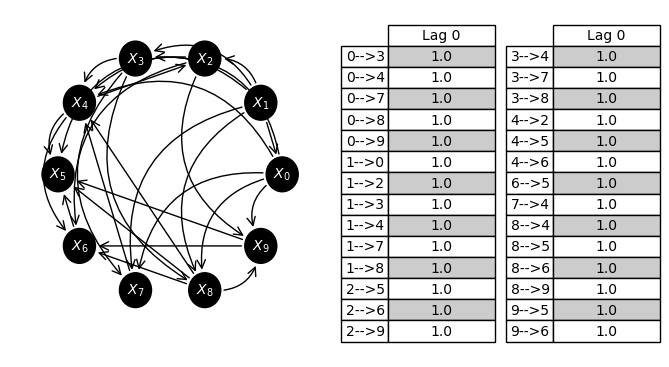

In [6]:
G._reset_adjacency_matrix()
G*=1.0
G

In [7]:
G._gen_coefficients_standardized()

In [16]:
G.cov

array([[[1, 0.0157798928911696, -0.0570836117278631, -0.146085658058269,
         0.289270309255412, -0.0252317895231774, 0.323377285303637,
         -0.271707770786627, -0.0297476213975001, 0],
        [0.0157798928911696, 1, 0.0214149093636946, 0.164781919779650,
         0.503259626978121, -0.236086172617099, -0.250088160179013,
         0.0253985113758125, -1.37273379409038, 0],
        [-0.0570836117278631, 0.0214149093636946, 1, 0.0583009484754885,
         -0.248370868026092, -0.234973264924529, 0.0630999561868292,
         -0.0229130608389555, 0.114792483614713, 0],
        [-0.146085658058269, 0.164781919779650, 0.0583009484754885, 1,
         0.0410880247530052, -0.349132131731416, -0.325724762326989,
         0.232691688119665, -0.161401904844206, 0],
        [0.289270309255412, 0.503259626978121, -0.248370868026092,
         0.0410880247530052, 1, -0.124864511500483, -0.0337507278124827,
         -0.0637890292647463, -0.693116897641122, 0],
        [-0.0252317895231774, -0.

TimeSeries 140735638865552

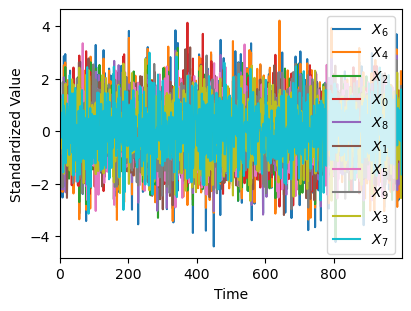

In [8]:
G.gen_data()

discarded 2 solutions that did not converge


Graph 140735809148240

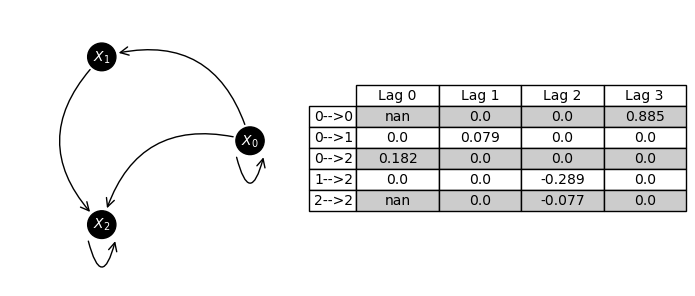

In [3]:
G.gen_coefficients()

TimeSeries 140735663855056

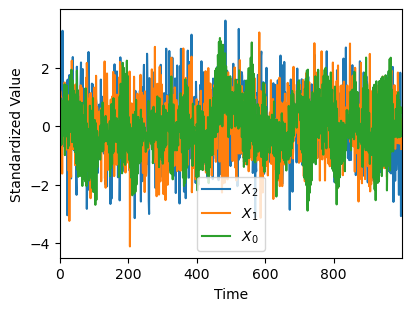

In [4]:
G.gen_data()

In [6]:
G.data.var()

array([[0.98292158],
       [1.00869072],
       [1.14005004]])

In [5]:
G.sortability('R2')

0.3333333333333333

In [38]:
d = G.N*G.tau_max
COV = (np.ones((d,d))*np.nan)
def irange(l):
    return slice(G.N*l,G.N*(l+1))
for l1 in range(G.tau_max):
    for l2 in range(G.tau_max):
        COV[irange(l1),irange(l2)]=G.cov[l2-l1]
COV

array([[ 1.00000000e+00, -1.52017031e-40,  2.04119287e-37,
         0.00000000e+00, -9.50284117e-39,  2.85975108e-01,
         0.00000000e+00, -2.95239918e-38,  4.36053158e-02],
       [-1.52017031e-40,  1.00000000e+00, -3.46759492e-03,
        -9.74878751e-42,  3.50897625e-03, -1.77755147e-03,
        -1.71060227e-41,  1.28991975e-03, -9.11204828e-04],
       [ 2.04119287e-37, -3.46759492e-03,  1.00000000e+00,
         6.56778612e-38, -2.22578480e-02,  1.52479410e-01,
         0.00000000e+00, -1.45029516e-01,  2.32499705e-02],
       [ 0.00000000e+00, -9.74878751e-42,  6.56778612e-38,
         1.00000000e+00, -1.52017031e-40,  2.04119287e-37,
         0.00000000e+00, -9.50284117e-39,  2.85975108e-01],
       [-9.50284117e-39,  3.50897625e-03, -2.22578480e-02,
        -1.52017031e-40,  1.00000000e+00, -3.46759492e-03,
        -9.74878751e-42,  3.50897625e-03, -1.77755147e-03],
       [ 2.85975108e-01, -1.77755147e-03,  1.52479410e-01,
         2.04119287e-37, -3.46759492e-03,  1.000000

In [42]:
CSR = np.linalg.cholesky(COV)
CSR

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.52017031e-40,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.04119287e-37, -3.46759492e-03,  9.99993988e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -9.74878751e-42,  6.56782223e-38,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-9.50284117e-39,  3.50897625e-03, -2.22458140e-02,
         1.30908270e-39,  9.99746373e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.85975108e-01, -1.77755147e-03,  1.52474163e-01,
         1.94105038e-37, -6.94632752e-05,  9.460267

In [45]:
X = np.random.normal(size=(d, 1))
X

array([[ 0.15403516, -0.4763674 , -1.2514228 , ...,  0.37097212,
        -0.1053207 ,  0.77291642],
       [-0.85792705, -0.23760237,  0.66894273, ...,  0.53431843,
         0.17177283,  0.89528953],
       [ 0.94529502,  0.86209246, -1.54554082, ...,  0.22033182,
         0.03502571, -0.46279273],
       ...,
       [ 0.9177586 , -0.61869293, -0.30318248, ..., -1.04640113,
         0.87119456,  0.01089685],
       [ 0.40360549,  0.39823354,  0.39098679, ..., -0.6511717 ,
        -0.9043494 , -0.89750498],
       [-1.63755211, -0.2743782 , -0.37811791, ..., -0.04770358,
        -1.27772277,  0.14947961]])

In [62]:
DS[0].data.data[:,-5:]

array([[ 0.73727517, -0.07755312, -1.39741567,  0.        ,  0.        ],
       [-0.84218431, -0.859328  ,  1.16870018,  0.        ,  0.        ],
       [-0.97877024, -0.59388499,  0.0427246 ,  0.        ,  0.        ],
       [ 0.21632447, -0.25451189, -0.17335389,  0.        ,  0.        ],
       [ 0.79970756, -0.95088354, -0.8178317 ,  0.        ,  0.        ],
       [ 0.97722597, -0.89325521,  1.10527567,  0.        ,  0.        ],
       [-0.59059671, -0.38946271,  0.10090354,  0.        ,  0.        ],
       [ 1.83636399,  0.43793133,  0.92245159,  0.        ,  0.        ],
       [-0.71811246,  0.06909777,  0.19691716,  0.        ,  0.        ],
       [-0.44314595,  1.24306642, -0.09348144,  0.        ,  0.        ]])

In [54]:
test = np.array([[0,1,2,3,4,5]]).T
test

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

In [55]:
test.reshape((3,2), order='F')

array([[0, 3],
       [1, 4],
       [2, 5]])

In [51]:
np.sum((np.cov(np.matmul(CSR, X))-COV)**2)

0.1021252085941103

In [20]:
G.cov[

array([[[1, R1.0(0)],
        [R1.0(0), 1]],

       [[R0.0(1), R0.1(1)],
        [R1.0(1), R1.1(1)]],

       [[0, R0.1(2)],
        [0, R1.1(2)]],

       [[0, 0],
        [R0.1(2), R1.1(2)]],

       [[R0.0(1), R1.0(1)],
        [R0.1(1), R1.1(1)]]], dtype=object)

In [7]:
np.empty(shape=(1,1))

array([[1.]])

Graph 140735798048976

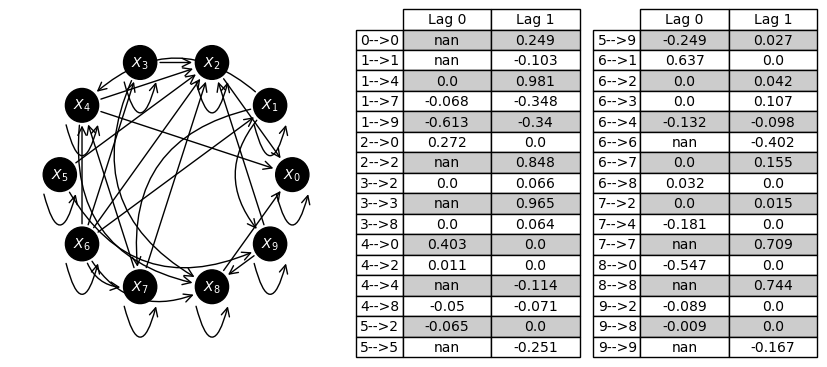

In [4]:
G

TimeSeries 140735800014416

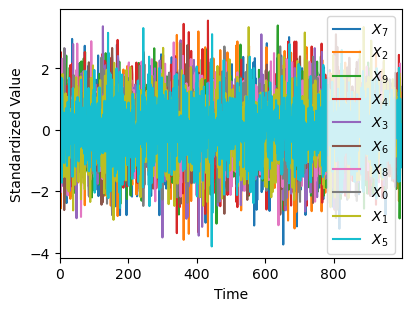

In [6]:
DS[0].gen_data()

In [7]:
DS[0].data.var()

array([[0.96934819],
       [0.96077327],
       [1.06955341],
       [1.01899586],
       [1.02788451],
       [0.93508886],
       [1.00446647],
       [1.08092453],
       [1.00425288],
       [1.06086963]])

In [5]:
DS[0].topo_order

array([6, 7, 8, 0, 5, 4, 9, 1, 2, 3])

Graph 140735651651920

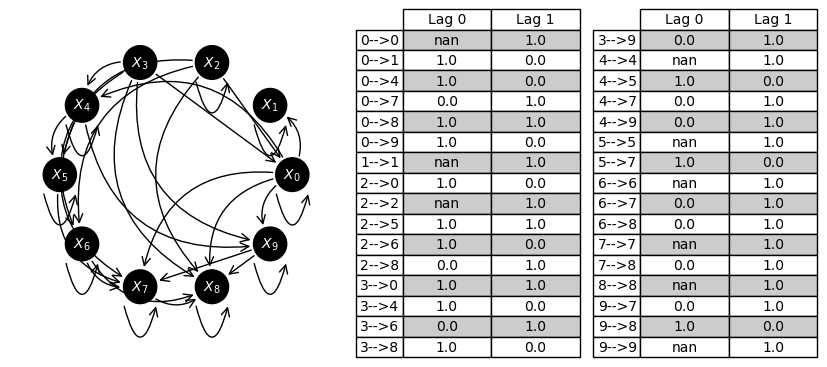

In [3]:
G = tsGraph(10, 1, init_type='no_feedback')
G

Graph 140735651651920

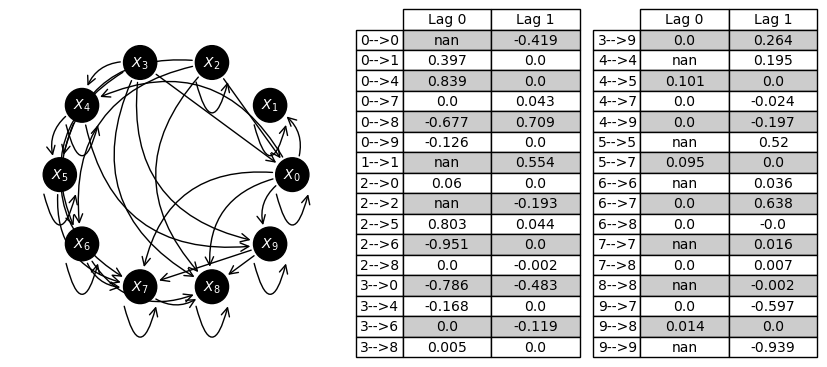

In [4]:
G.gen_coefficients()
G

TimeSeries 140735587110352

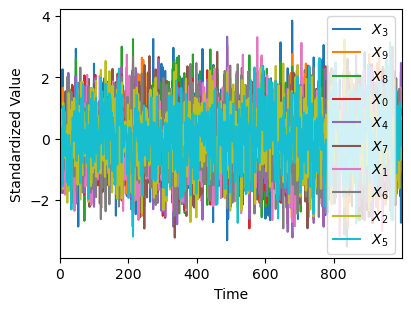

In [9]:
G.gen_data()

In [10]:
G.data.var()

array([[1.03913674],
       [0.99919002],
       [0.96633468],
       [1.10627646],
       [1.03678819],
       [0.87290007],
       [0.99160126],
       [1.02845846],
       [1.05462323],
       [1.06016343]])

Graph 140735729147664

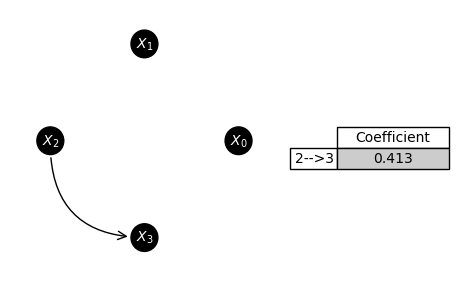

In [6]:
DS[0]

In [4]:
L = [1, 2, 3]

In [11]:
list([1,2,3])

[1, 2, 3]

In [10]:
import inspect
lines = inspect.getsource(L.__repr__)
print(lines)

TypeError: module, class, method, function, traceback, frame, or code object was expected, got method-wrapper

In [5]:
dir(L)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [8]:
L.__repr__(1)

TypeError: expected 0 arguments, got 1

In [11]:
print(sys.version)

3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]


In [2]:
ex_dict = {'a': 1, 'b': 2}

In [42]:
", ".join(["{} {}{}"]*len(ex_dict.keys()))

'{} {}{}, {} {}{}'

In [34]:
sum(((v, k) for k, v in ex_dict.items()),())

(1, 'a', 2, 'b')

In [18]:
tuple(ex_dict.keys())

('a', 'b')

In [12]:
def ex_func(**args):
    return sum(list(args.values()))

In [14]:
ex_func(**ex_dict)

3

In [15]:
def ex_func2(args1, args2):
    return ex_func(**args1)*ex_func(**args2)

In [16]:
ex_func2(ex_dict, ex_dict)

9

In [8]:
sum(list(ex_dict.values()))

3

In [7]:
Gs, Ds, text_trap = gen_unitless_time_series(T=100, B=10, **{'N':3, 'tau_max':1})

Discarded 1 system: 0 that did not converge, 0 that were analytically unstable, 1 that computationally diverged, and 0 that timed out.


TimeSeries 140735555236944

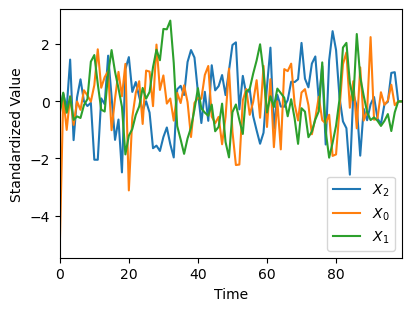

In [9]:
Ds[0]

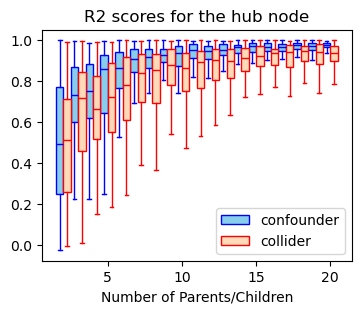

In [2]:
sortability_compare_collider_confounder(T = 100, B = 100)

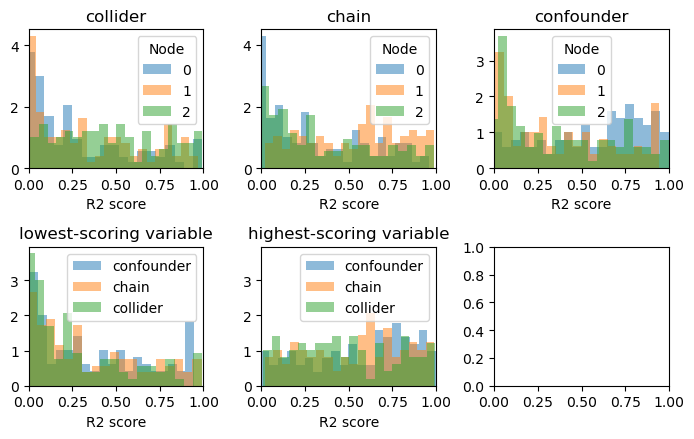

In [2]:
sortability_compare_triple_types(O = 100, B = 100)

In [ ]:
gen_unitless_iid_SCMs(N=20, O=100, B=5000, **kwargs)

In [4]:
L = gen_unitless_iid_SCMs(N=3, B=3, **{'init_type': 'specified'})

[Graph 140735850568720, Graph 140735790432784, Graph 140735790365840]

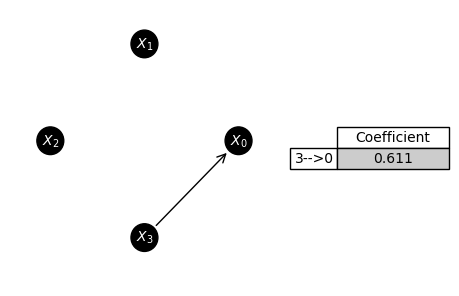

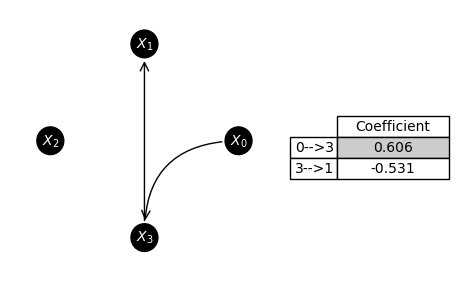

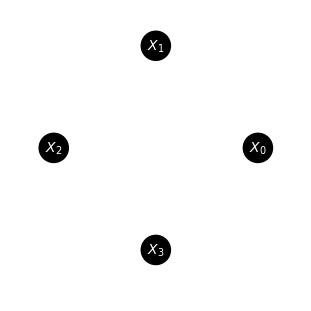

In [5]:
L

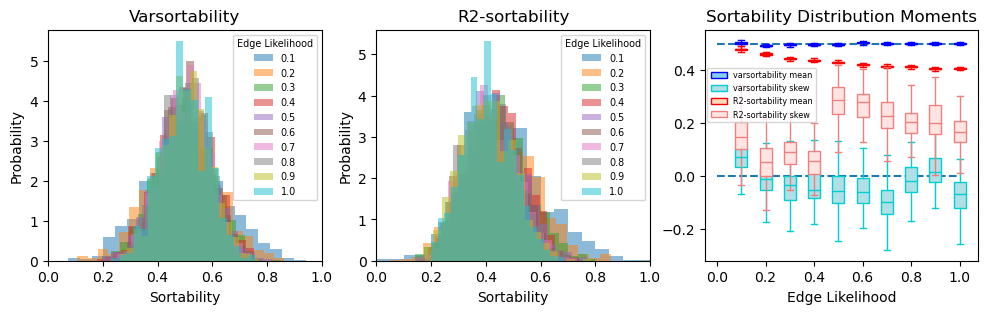

In [7]:
sortability_compare_p(B=100)

Graph 140735708913424

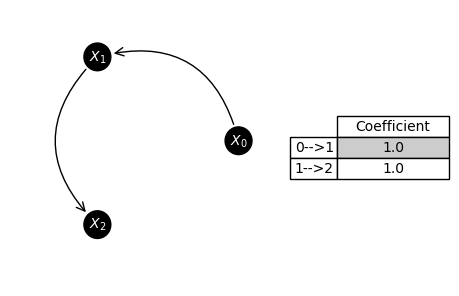

In [13]:
G = Graph(3, init_type='random')
G

Graph 140735710386320

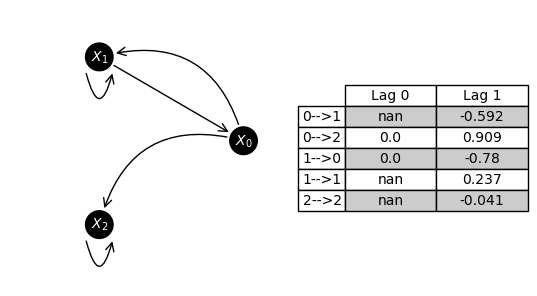

In [24]:
G

In [22]:
G.get_adjacencies()

array([[False,  True,  True],
       [ True,  True, False],
       [False, False,  True]])

In [25]:
G.topo_order

array([1, 0, 2])

In [26]:
G.get_num_parents()

array([1, 2, 2])

In [27]:
G.ancestry()

array([[ True,  True,  True],
       [ True,  True,  True],
       [False, False,  True]])

In [29]:
G.order(2)

array([2])

Graph 140737025826000

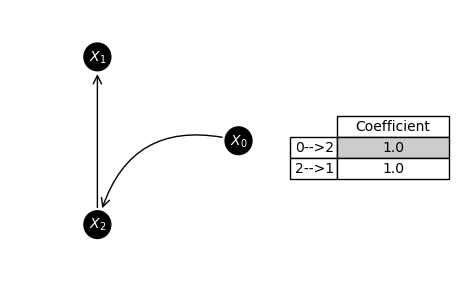

In [4]:
G = Graph.specified(G.A)
G

In [5]:
G.topo_order

array([0, 2, 1])

Graph 140737025826000

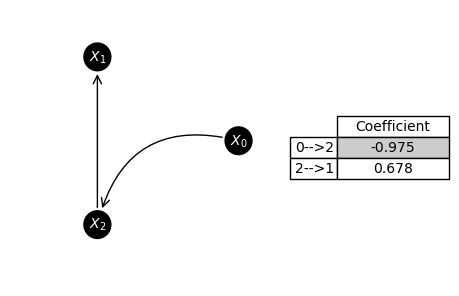

In [6]:
G.gen_coefficients('standardized')
G

In [7]:
D = G.gen_data(100000)
D.var()

array([[0.99421279],
       [1.00406468],
       [0.99412659]])

In [8]:
G.sortability('R2')

0.3333333333333333

Graph 140735710386320

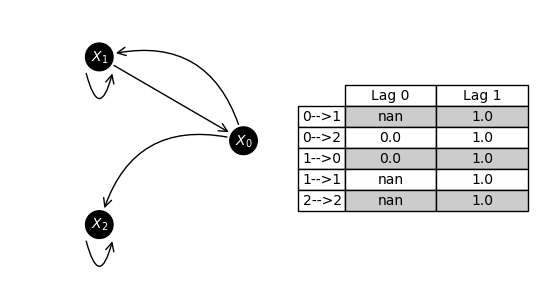

In [19]:
G = tsGraph(3,1,init_type='random', p=.5)
G

Graph 140735710386320

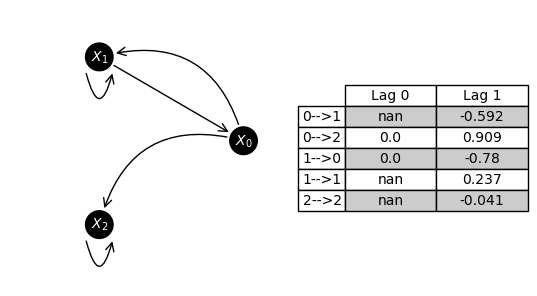

In [20]:
G.gen_coefficients('standardized')
G

In [11]:
G.s2

array([0.768330852265631, 0.991567914485012, 0.895256630877118],
      dtype=object)

TimeSeries 140735711393232

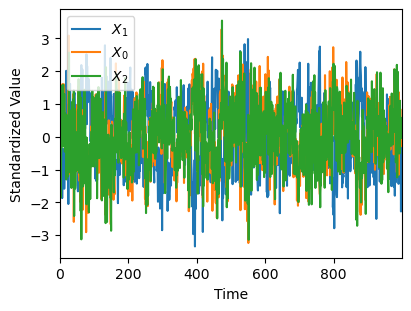

In [21]:
G.gen_data()

In [21]:
G.data.var()

array([[0.83215895],
       [1.17261755],
       [1.06636981]])

In [14]:
G.sortability('R2_summary')

0.5

In [32]:
G+G==G*2

True

In [28]:
G.any(axis='time')

array([[ True, False, False],
       [False, False,  True],
       [ True,  True,  True]])

In [18]:
import numpy as np

In [19]:
new_order = np.arange(G.N)
np.random.shuffle(new_order)
new_order

array([1, 0, 2])

In [23]:
G==Graph.specified(Graph.select_vars(G.A, new_order), new_order[G.topo_order])

True

In [4]:
G[:,:,:1].shape

(5, 5, 1)

Graph 140735852250256

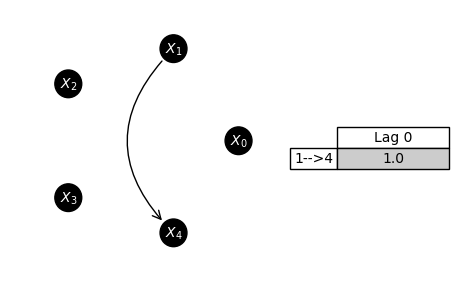

In [5]:
G2 = Graph.specified(G.A[:,:,:1], G.topo_order, noise=G.s2, labels=G.labels)
G2

Graph 140735851543952

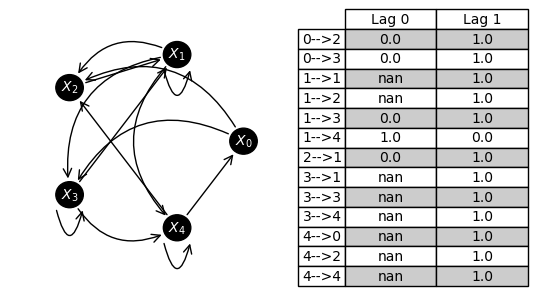

In [6]:
Graph.ccopy(G)

In [14]:
G.components

[array([2]), array([0]), array([1]), array([3]), array([4])]

Graph 140735712643856

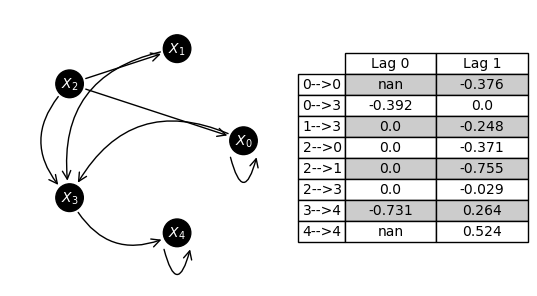

In [15]:
G = G.gen_coefficients()
G

Graph 140735715621584

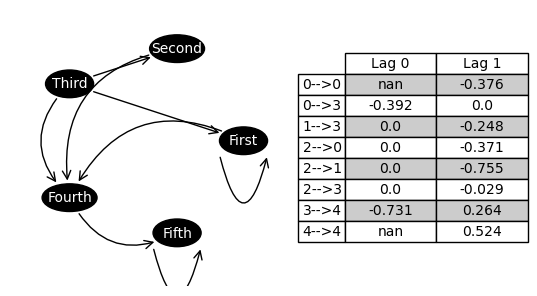

In [16]:
G = Graph(5,1,init_type='specified', init=G.A, noise=G.s2, labels=['First', 'Second', 'Third', 'Fourth', 'Fifth'], topo_order=G.topo_order)
G

TimeSeries 140735689347152

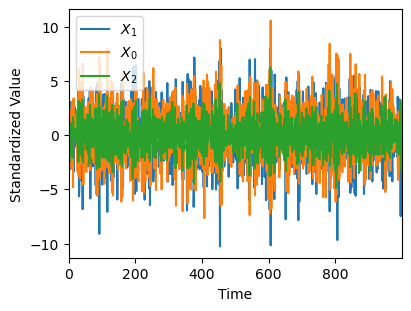

In [33]:
G.gen_data()

In [34]:
G.sortability()

0.5

In [37]:
G.sortability('R2_summary')

0.5